In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
import logging
sys.path.append(os.path.abspath('../Scripts'))
sys.path.append(os.path.abspath('../src'))
# Import moduls or Script files
from data_loading import LoadData
from logger_config import configure_logging
from time_series_analysis import SalesAnalyzer
from plot import Plot
from eda import EDA

In [2]:
# Configure logging
configure_logging()

# Use the class
loader = LoadData()
eda = EDA()
plot = Plot()
sales_behavior = SalesAnalyzer()


2025-01-02 14:37:53,305 - INFO - Initialized LoadData class.
2025-01-02 14:37:53,307 - INFO - Initialized EDA class.
2025-01-02 14:37:53,308 - INFO - Initialized Plot class.
2025-01-02 14:37:53,309 - INFO - Initialized Seasonality Sales Analysis class.


In [3]:
try:
    df_sample, df_store, df_test, df_train = loader.read_data()
    print("Data loaded successfully.")
    # Merge sales and store data
    train_merged_df = loader.merge_train_with_store(df_train, df_store)
    test_merged_df = loader.merge_train_with_store(df_test, df_store)
    print("Data merged successfully successfully.")
except Exception as e:
    logging.critical("Error in data loading process.", exc_info=True)

2025-01-02 14:37:57,194 - INFO - Starting to read data files.
2025-01-02 14:37:58,126 - INFO - Successfully read all data files.
2025-01-02 14:37:58,127 - INFO - Starting to merge training or testing data with store data.


Data loaded successfully.


2025-01-02 14:37:58,347 - INFO - Successfully merged training or testing data with store data.
2025-01-02 14:37:58,349 - INFO - Starting to merge training or testing data with store data.
2025-01-02 14:37:58,365 - INFO - Successfully merged training or testing data with store data.


Data merged successfully successfully.


In [52]:
eda.check_promotion_distribution(train_merged_df, test_merged_df)

2025-01-02 10:43:41,346 - INFO - Starting to checking promotion distribution on training and test dataset.
2025-01-02 10:43:41,352 - INFO - Successfully checking promotion distribution of training and testing of store data.


Promotion distribution in training set:
 - Promo: 38.15% active
 - Promo2: 50.06% active

Promotion distribution in test set:
 - Promo: 39.58% active
 - Promo2: 58.06% active

The Promo distribution between train and test sets is similar.
The Promo2 distribution between train and test sets is significantly different.


2025-01-02 10:43:43,502 - INFO - Starting to ploting promotion distribution on training and test dataset.


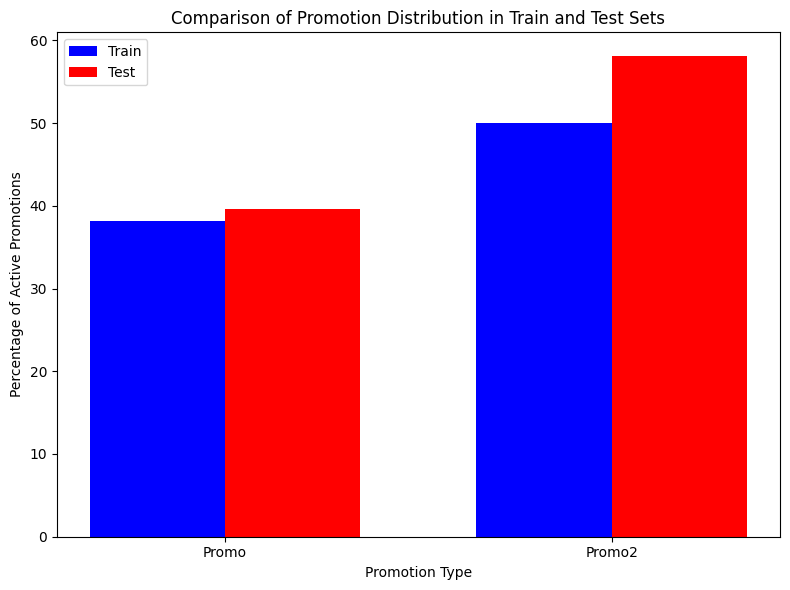

2025-01-02 10:43:43,852 - INFO - Successfully Ploting promotion distribution of training and testing of store data.


In [53]:
plot.check_promotion_distribution_with_plot(train_merged_df, test_merged_df)

In [4]:
df_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
df_state, df_school = sales_behavior.tag_holiday_periods(df_train)

2025-01-02 14:38:12,950 - INFO - Starting to Holiday Sales analysis.


In [5]:
# Convert Date to datetime
import pandas as pd
df = df_train
df["Date"] = pd.to_datetime(df["Date"])

# Define holidays
df["StateHoliday"] = df["StateHoliday"].replace({"0": None})
holiday_dates = df.loc[df["StateHoliday"].notnull(), "Date"]

# Create columns for "Before Holiday", "During Holiday", "After Holiday"
df["HolidayPeriod"] = "Normal"
for holiday in holiday_dates:
    df.loc[df["Date"] == holiday, "HolidayPeriod"] = "During Holiday"
    df.loc[df["Date"] == holiday - pd.Timedelta(days=1), "HolidayPeriod"] = "Before Holiday"
    df.loc[df["Date"] == holiday + pd.Timedelta(days=1), "HolidayPeriod"] = "After Holiday"

# Analyze sales behavior
behavior_summary = df.groupby("HolidayPeriod")["Sales"].agg(["mean", "sum", "median"])

print(behavior_summary)

                       mean         sum  median
HolidayPeriod                                  
After Holiday   6874.590616   276186678  6707.0
Before Holiday  5916.391317   205772090  6022.0
During Holiday  1751.875201    63197146     0.0
Normal          5879.653831  5328024709  5787.0


In [20]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,HolidayPeriod
0,1,5,2015-07-31,5263,555,1,1,None,1,Normal
1,2,5,2015-07-31,6064,625,1,1,None,1,Normal
2,3,5,2015-07-31,8314,821,1,1,None,1,Normal
3,4,5,2015-07-31,13995,1498,1,1,None,1,Normal
4,5,5,2015-07-31,4822,559,1,1,None,1,Normal


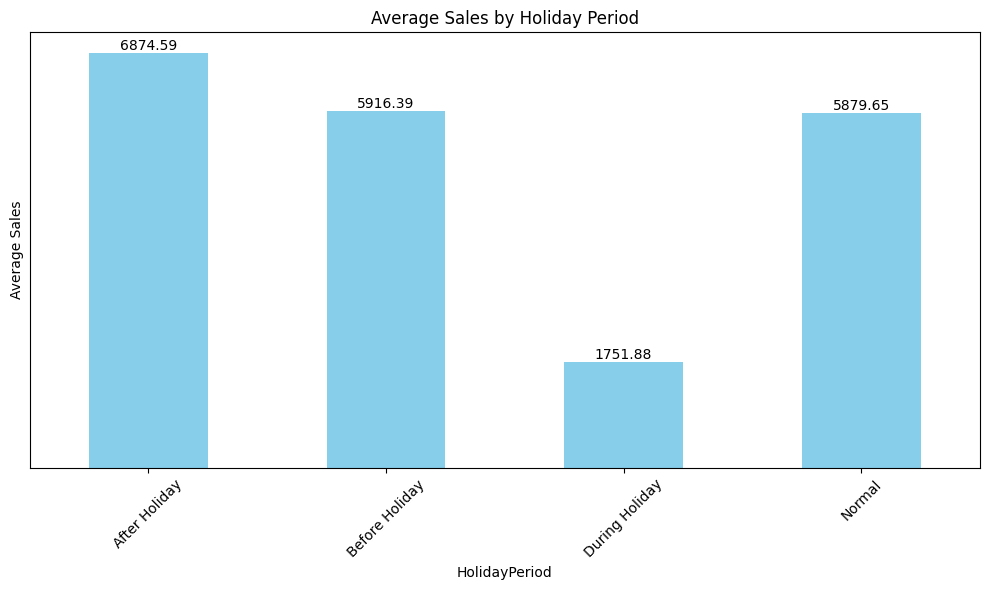

In [ ]:
column="Sales"
title="Average Sales by State Holiday Period"
group_by = "HolidayPeriod"
plot.plot_sales_by_period(df_state, column, title, group_by)

In [ ]:
column="Sales"
title="Average Sales by School Holiday Period"
group_by = "SchoolHolidayPeriod"
plot.plot_sales_by_period(df_school, column, title, group_by)

In [6]:
# plot.check_sales_behavior_around_holidays(df_train, df_test)

In [ ]:
df_train.head()